# What's in this notebook?
Creating features:
- length
- sentiment
- similarity between title and description
- count vectorization

In [2]:
import pickle

with open('preprocessed_data.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)

data

,judgement,id,description,title,url,author_flair
id,,,,,,
1fy0bx,0,1fy0bx,I work in an office that requires me to wear a...,AItA: I like air conditioning and my coworkers...,http://www.reddit.com/r/AmItheAsshole/comments...,Asshole #1
1ytxov,1,1ytxov,[Here is the post in question](http://www.redd...,[AITA] I wrote an explanation in TIL and came ...,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yu29c,1,1yu29c,"My parents are diabetic, morbidly obese, and a...",[AITA] Threw my parent's donuts away,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yu8hi,0,1yu8hi,I was four.,I told a goth girl she looked like a clown.,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yuc78,1,1yuc78,http://www.reddit.com/r/HIMYM/comments/1vvfkq/...,[AItA]: Argument I had with another redditor i...,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yugsc,1,1yugsc,I love the musical *Les Miserables*. A coworke...,AITA Had a disagreement about Les Miserables w...,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yuj95,1,1yuj95,Backstory: I'm a semi-professional competitive...,"[AITA] I 'hacked' our house router, changed th...",http://www.reddit.com/r/AmItheAsshole/comments...,None
1yukgb,0,1yukgb,2 Years ago my friend makes out with this girl...,[AITA] High School bullshit,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yux10,1,1yux10,His name is Scoop. \n\nOver the two years I ha...,[ATIA] I permanently give a customer decaf.,http://www.reddit.com/r/AmItheAsshole/comments...,None


In [17]:
data = data.astype({'judgement': 'int32'}, inplace=True)

In [18]:
data.dtypes

judgement        int32
id              object
description     object
title           object
url             object
author_flair    object
length           int64
dtype: object

## Feature: Length of description
Do TA posts tend to me more lengthy?

In [5]:
import re 

data['length'] = data['description'].apply(lambda x: len(re.split(r'\n|\s', x)))

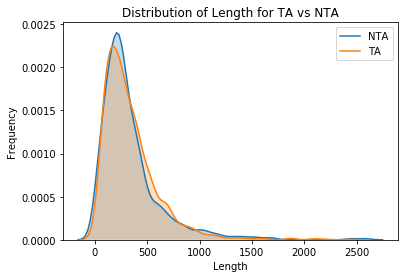

In [22]:
import seaborn as sns
ax = sns.kdeplot(data[['length', 'judgement']][data['judgement'] == 1]['length'], shade = True, label="NTA")
ax = sns.kdeplot(data[['length', 'judgement']][data['judgement'] == 0]['length'], shade = True, label="TA")
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Length for TA vs NTA')

fig = ax.get_figure()

## Feature: Sentiment
Does the emotion conveyed in the title or in the description differ based on if the post is a TA post or a NTA post?

### Textblob


#### Title Sentiment

In [69]:
import textblob

# If you want subjectivity, set polarity to False
def sentiment_tb(sentence, polarity=True):
    sentence = re.sub(r'[\[AITait\]]{4,6}:?\s', '', sentence)
    if polarity == False:
        return textblob.TextBlob(sentence).sentiment.subjectivity
    return textblob.TextBlob(sentence).sentiment.polarity

data['title_pol'] = data['title'].apply(lambda x: sentiment_tb(x))
data['title_subj'] = data['title'].apply(lambda x: sentiment_tb(x, polarity=False))

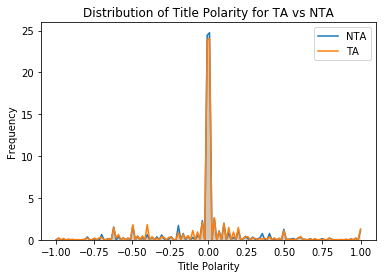

In [72]:
ax = sns.kdeplot(data[['title_pol', 'judgement']][data['judgement'] == 1]['title_pol'], shade = True, label="NTA")
ax = sns.kdeplot(data[['title_pol', 'judgement']][data['judgement'] == 0]['title_pol'], shade = True, label="TA")
ax.set_xlabel('Title Polarity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Title Polarity for TA vs NTA')

fig = ax.get_figure()

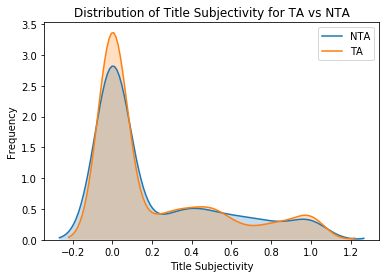

In [73]:
ax = sns.kdeplot(data[['title_subj', 'judgement']][data['judgement'] == 1]['title_subj'], shade = True, label="NTA")
ax = sns.kdeplot(data[['title_subj', 'judgement']][data['judgement'] == 0]['title_subj'], shade = True, label="TA")
ax.set_xlabel('Title Subjectivity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Title Subjectivity for TA vs NTA')

fig = ax.get_figure()

#### Description Sentiment

In [80]:
data['desc_pol'] = data['description'].apply(lambda x: sentiment_analysis(x))
data['desc_subj'] = data['description'].apply(lambda x: sentiment_analysis(x, polarity=False))

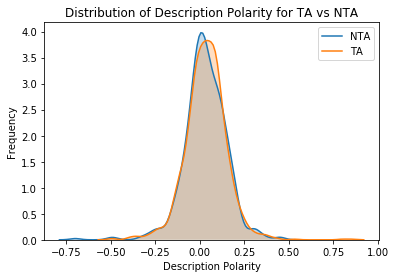

In [82]:
ax = sns.kdeplot(data[['desc_pol', 'judgement']][data['judgement'] == 1]['desc_pol'], shade = True, label="NTA")
ax = sns.kdeplot(data[['desc_pol', 'judgement']][data['judgement'] == 0]['desc_pol'], shade = True, label="TA")
ax.set_xlabel('Description Polarity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Description Polarity for TA vs NTA')

fig = ax.get_figure()

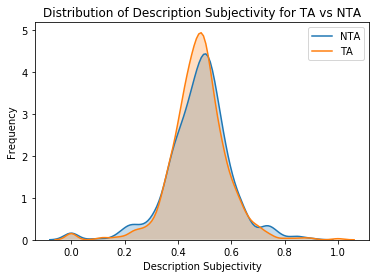

In [83]:
ax = sns.kdeplot(data[['desc_subj', 'judgement']][data['judgement'] == 1]['desc_subj'], shade = True, label="NTA")
ax = sns.kdeplot(data[['desc_subj', 'judgement']][data['judgement'] == 0]['desc_subj'], shade = True, label="TA")
ax.set_xlabel('Description Subjectivity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Description Subjectivity for TA vs NTA')

fig = ax.get_figure()

#### Sentiment Similarity

In [84]:
data['pol_similarity'] = data.apply(lambda x: x['title_pol'] - x['desc_pol'], axis=1)
data['subj_similarity'] = data.apply(lambda x: x['title_subj'] - x['desc_subj'], axis=1)

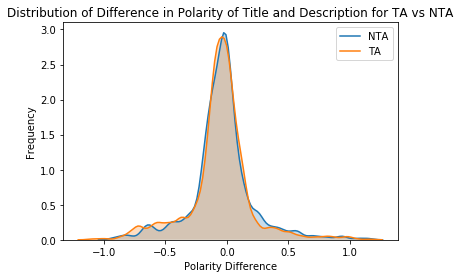

In [85]:
ax = sns.kdeplot(data[['pol_similarity', 'judgement']][data['judgement'] == 1]['pol_similarity'], shade = True, label="NTA")
ax = sns.kdeplot(data[['pol_similarity', 'judgement']][data['judgement'] == 0]['pol_similarity'], shade = True, label="TA")
ax.set_xlabel('PolIarity Difference')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Difference in Polarity of Title and Description for TA vs NTA')

fig = ax.get_figure()

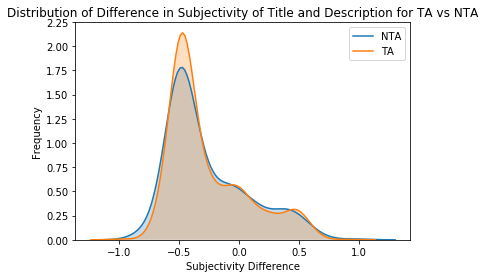

In [86]:
ax = sns.kdeplot(data[['subj_similarity', 'judgement']][data['judgement'] == 1]['subj_similarity'], shade = True, label="NTA")
ax = sns.kdeplot(data[['subj_similarity', 'judgement']][data['judgement'] == 0]['subj_similarity'], shade = True, label="TA")
ax.set_xlabel('Subjectivity Difference')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Difference in Subjectivity of Title and Description for TA vs NTA')

fig = ax.get_figure()

### VADER

In [107]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 3.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [108]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [115]:
# fast
data['title_vader'] = data['title'].apply(lambda x:analyser.polarity_scores(x)['compound'] )
# takes a minute
data['desc_vader'] = data['description'].apply(lambda x:analyser.polarity_scores(x)['compound'] )

In [118]:
data['vader_similarity'] = data.apply(lambda x: x.title_vader - x.desc_vader, axis=1)

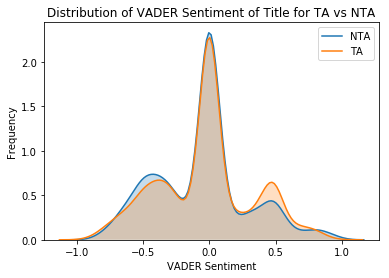

In [116]:
ax = sns.kdeplot(data[data['judgement'] == 1]['title_vader'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 0]['title_vader'], shade = True, label="TA")
ax.set_xlabel('VADER Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of VADER Sentiment of Title for TA vs NTA')

fig = ax.get_figure()

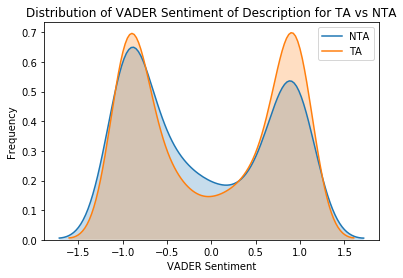

In [117]:
ax = sns.kdeplot(data[data['judgement'] == 1]['desc_vader'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 0]['desc_vader'], shade = True, label="TA")
ax.set_xlabel('VADER Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of VADER Sentiment of Description for TA vs NTA')

fig = ax.get_figure()

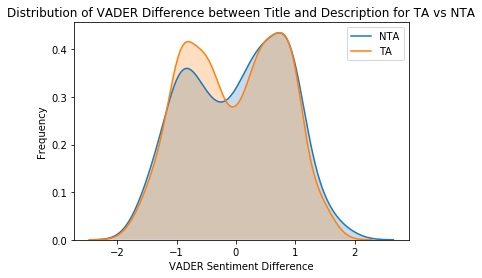

In [119]:
ax = sns.kdeplot(data[data['judgement'] == 1]['vader_similarity'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 0]['vader_similarity'], shade = True, label="TA")
ax.set_xlabel('VADER Sentiment Difference')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of VADER Difference between Title and Description for TA vs NTA')

fig = ax.get_figure()

### Afinn

In [120]:
!pip install afinn

# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

     |████████████████████████████████| 61kB 3.5MB/s eta 0:00:011
  Created wheel for afinn: filename=afinn-0.1-cp37-none-any.whl size=53454 sha256=9c8602ea923350f59fd42f7e073a7d0e3907c7b8dde8041910fb894a85b4683b
  Stored in directory: /Users/hannah/Library/Caches/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


4.0

In [126]:
data['title_af'] = data['title'].apply(lambda x: af.score(x))
data['desc_af'] = data['description'].apply(lambda x: af.score(x))
data['af_similarity'] = data.apply(lambda x: x.title_af - x.desc_af, axis=1)

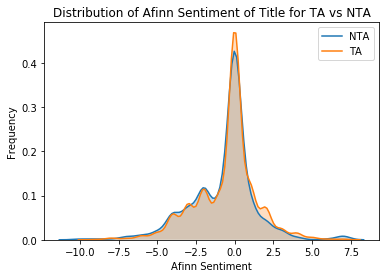

In [127]:
ax = sns.kdeplot(data[data['judgement'] == 1]['title_af'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 0]['title_af'], shade = True, label="TA")
ax.set_xlabel('Afinn Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Afinn Sentiment of Title for TA vs NTA')

fig = ax.get_figure()

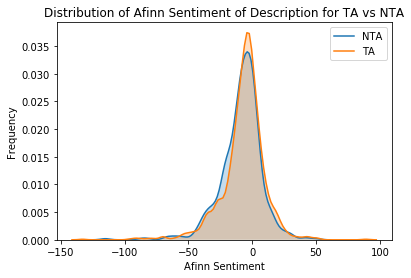

In [128]:
ax = sns.kdeplot(data[data['judgement'] == 1]['desc_af'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 0]['desc_af'], shade = True, label="TA")
ax.set_xlabel('Afinn Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Afinn Sentiment of Description for TA vs NTA')

fig = ax.get_figure()

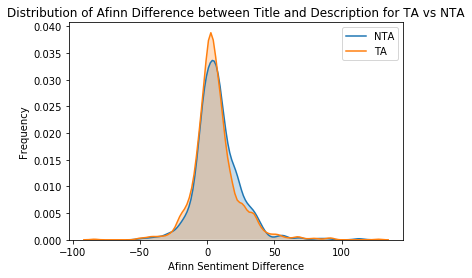

In [129]:
ax = sns.kdeplot(data[data['judgement'] == 1]['af_similarity'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 0]['af_similarity'], shade = True, label="TA")
ax.set_xlabel('Afinn Sentiment Difference')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Afinn Difference between Title and Description for TA vs NTA')

fig = ax.get_figure()

## Feature(s): TF-IDF
This hopefully will be more telling than the previous features! We have hope since the other features were more heavy handed in their creation, but we can more finely tune the creation of features here.

In [156]:
from nltk.corpus import stopwords

stop_words = ['aita', 'asshole', 'nta', 'ta', 'reddit', 'I']
stop_words.extend(set(stopwords.words('english')))

In [157]:
stop_words

['aita',
 'asshole',
 'nta',
 'ta',
 'reddit',
 'I',
 'than',
 'through',
 'shan',
 'because',
 'this',
 's',
 'of',
 "weren't",
 "couldn't",
 'to',
 'weren',
 'her',
 "she's",
 'there',
 'don',
 'during',
 'm',
 'then',
 'other',
 'he',
 'any',
 'they',
 'has',
 'had',
 'now',
 'more',
 'a',
 'why',
 'about',
 'for',
 'between',
 'after',
 'up',
 'theirs',
 'are',
 'yourselves',
 'and',
 'll',
 "needn't",
 'those',
 'wouldn',
 "you'd",
 "didn't",
 'once',
 'ours',
 'herself',
 'will',
 'does',
 "wasn't",
 'nor',
 'yourself',
 "shan't",
 'being',
 'most',
 'them',
 'just',
 'd',
 'do',
 'further',
 'some',
 'y',
 'which',
 'ma',
 'ourselves',
 "you're",
 'above',
 'again',
 'only',
 'into',
 'on',
 'was',
 'as',
 'each',
 "hadn't",
 'against',
 'she',
 'below',
 'hasn',
 "mustn't",
 'from',
 'here',
 'until',
 'me',
 'couldn',
 'haven',
 'our',
 'you',
 'these',
 'out',
 'have',
 'whom',
 'am',
 'should',
 'be',
 'before',
 'my',
 'how',
 'by',
 'yours',
 'hers',
 'it',
 'needn',
 'mys

In [158]:
def remove_stopwords_and_punc(sentence):
    new_sentence = ''
    for punc in ['.', '!', '?', '@', '#', '$', 
                 '%', '^', '&', '*', '(', ')', 
                '<', '>', '/', '\\', '"', ';',
                ':', '-', '_', '\n', '[', ']']:
        sentence = sentence.replace(punc, '')
    for word in sentence.split(' '):
        if word.lower() not in stop_words:
            new_sentence += word.lower() + ' '
    return new_sentence[:-1]

print(data['title'].iloc[10])
remove_stopwords_and_punc(data['title'].iloc[10])

[AITA] My roommate has many undesirable qualities, but I may be talking about him too much.


'roommate many undesirable qualities, may talking much'

In [160]:
data['processed_titles'] = data['title'].apply(lambda x: remove_stopwords_and_punc(x))

In [161]:
data

,judgement,id,description,title,url,author_flair,length,title_pol,title_subj,desc_pol,desc_subj,pol_similarity,subj_similarity,title_vader,desc_vader,vader_similarity,title_af,desc_af,af_similarity,processed_titles
id,,,,,,,,,,,,,,,,,,,,
1fy0bx,0,1fy0bx,I work in an office that requires me to wear a...,AItA: I like air conditioning and my coworkers...,http://www.reddit.com/r/AmItheAsshole/comments...,Asshole #1,216,0.000000,0.000000,0.059552,0.508169,-0.059552,-0.508169,0.6124,0.3291,0.2833,4.0,-3.0,7.0,like air conditioning coworkers like working h...
1ytxov,1,1ytxov,[Here is the post in question](http://www.redd...,[AITA] I wrote an explanation in TIL and came ...,http://www.reddit.com/r/AmItheAsshole/comments...,None,78,0.000000,0.000000,-0.156818,0.656818,0.156818,-0.656818,0.0000,0.7692,-0.7692,0.0,-7.0,7.0,wrote explanation til came condescending
1yu29c,1,1yu29c,"My parents are diabetic, morbidly obese, and a...",[AITA] Threw my parent's donuts away,http://www.reddit.com/r/AmItheAsshole/comments...,None,118,0.000000,0.000000,-0.011667,0.434167,0.011667,-0.434167,0.0000,-0.1406,0.1406,0.0,-4.0,4.0,threw parent's donuts away
1yu8hi,0,1yu8hi,I was four.,I told a goth girl she looked like a clown.,http://www.reddit.com/r/AmItheAsshole/comments...,None,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.3612,0.0000,0.3612,2.0,0.0,2.0,told goth girl looked like clown
1yuc78,1,1yuc78,http://www.reddit.com/r/HIMYM/comments/1vvfkq/...,[AItA]: Argument I had with another redditor i...,http://www.reddit.com/r/AmItheAsshole/comments...,None,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.3612,0.0000,-0.3612,0.0,0.0,0.0,argument another redditor rhimym
1yugsc,1,1yugsc,I love the musical *Les Miserables*. A coworke...,AITA Had a disagreement about Les Miserables w...,http://www.reddit.com/r/AmItheAsshole/comments...,None,185,0.000000,0.000000,0.001042,0.369792,-0.001042,-0.369792,-0.3612,0.9075,-1.2687,-2.0,6.0,-8.0,disagreement les miserables coworker
1yuj95,1,1yuj95,Backstory: I'm a semi-professional competitive...,"[AITA] I 'hacked' our house router, changed th...",http://www.reddit.com/r/AmItheAsshole/comments...,None,410,0.000000,0.000000,0.044890,0.427986,-0.044890,-0.427986,0.0000,0.9174,-0.9174,-1.0,4.0,-5.0,"'hacked' house router, changed password turned..."
1yukgb,0,1yukgb,2 Years ago my friend makes out with this girl...,[AITA] High School bullshit,http://www.reddit.com/r/AmItheAsshole/comments...,None,165,0.160000,0.540000,-0.059615,0.405769,0.219615,0.134231,-0.5859,0.8058,-1.3917,-4.0,2.0,-6.0,high school bullshit
1yux10,1,1yux10,His name is Scoop. \n\nOver the two years I ha...,[ATIA] I permanently give a customer decaf.,http://www.reddit.com/r/AmItheAsshole/comments...,None,122,0.000000,0.000000,0.000000,0.700000,0.000000,-0.700000,0.0000,-0.1179,0.1179,0.0,-2.0,2.0,atia permanently give customer decaf
